In [ ]:
!pip install -q moviepy
!apt install imagemagick
!pip install imageio==2.4.1

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import moviepy
from moviepy.editor import VideoFileClip




val = input("ENTER THE NUMBER OF THE VIDEO YOU WANT TO EDIT: --1, 2, 3, 4, 5, 6, 7--  ")

Ovideo = "videos/video"
Ovideo = Ovideo + str(val) + ".gif"


# using an already build function we find out the duration of the gif
clip = VideoFileClip(Ovideo)
print(f"Duration of the video: ",clip.duration)


val2 = input("ENTER HOW MANY miliseconds away you want to take the frames(it will affect the quality):")


ENTER THE NUMBER OF THE VIDEO YOU WANT TO EDIT: --1, 2, 3, 4, 5, 6, 7 --  3
Duration of the video:  18.4
ENTER HOW MANY miliseconds away you want to take the frames(it will affect the quality):600


In [8]:

for j in range(3):
  # cv2.VideoCapture = lets you create a video capture object which is helpful to capture videos through webcam and then you may perform desired operations on that video.
    vidcap = cv2.VideoCapture(Ovideo)
    count = 1
    # vidcap.read() = citeste componentele cadrului(o matrice de pixeli)
    success,image = vidcap.read()
    #image.shape = returneaza number of layers, number of rows and number of columns
    #se salveaza intr un tuplu (original shape)
    orig_shape = image.shape 
    if j == 0:
        print("Video resolution: ",orig_shape[0:2])#layers and rows = rezolutia
        first_img = image#matrice ce stocheaza inforamtia din prima captura
    arr = image[:,:,j] #se iau primele trei coloane pe rand
    flat_arr = arr.ravel() # functia ravel uneste toate liniile si formeaza un vector 1D
    flat_vector = flat_arr
    while success:
      #here we count how many times we save a photo from the video(once 500 miliseconds we save photo)
      #cv2.CAP_PROP_POS_MSEC,(count*500) is responsible for skipping directly to the count*500 second in the video ((count*500)*1000th millisecond)
        vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*int(val2)))#The set() function creates a set object
        success,image = vidcap.read()
        if not success:
            break
        arr = image[:,:,j]
        flat = arr.ravel()
        flat_vector = np.vstack([flat_vector, flat])#np.vstaks Stack arrays in sequence vertically (row wise).
        count += 1

    print("Number of Frames taken from Video: ", count+1)
    print("Computing...")

    #se aplica DVS pe vectorul vertical transpus 
    SVD = np.linalg.svd(flat_vector.T, full_matrices=False)
    u, s, v = SVD

    #se formeaza o matrice cu zerouri
    Ar = np.zeros((len(u), len(v)))

    for i in range(1):
        Ar += s[i] * np.outer(u.T[i], v[i])    
    if (j==0):
        new_flat_vector_0=(Ar.T)
    elif j==1:
        new_flat_vector_1=(Ar.T)
    elif j==2:
        new_flat_vector_2=(Ar.T)



Video resolution:  (900, 1600)
Number of Frames taken from Video:  32
Computing...
Number of Frames taken from Video:  32
Computing...
Number of Frames taken from Video:  32
Computing...


In [7]:
print(f"u = ", u)
print(f"s = ", s)
print(f"v = ", v)

new_flat_vector = np.zeros((len(flat_vector), len(flat_vector.T)*3))
for i in range(len(new_flat_vector_0.T)):
    new_flat_vector[:,i+i*2]   = new_flat_vector_0[:,i]
    new_flat_vector[:,i+1+i*2] = new_flat_vector_1[:,i]
    new_flat_vector[:,i+2+i*2] = new_flat_vector_2[:,i]

u =  [[-1.04941667e-03  6.10443781e-07  7.15116754e-06 ... -1.70900636e-06
   2.18870559e-06 -1.95539540e-06]
 [-1.09794461e-03  6.38672420e-07  7.48185743e-06 ... -1.78803534e-06
   2.28991778e-06 -2.04581840e-06]
 [-1.09794461e-03  6.38672421e-07  7.48185743e-06 ... -1.78803533e-06
   2.28991778e-06 -2.04581840e-06]
 ...
 [-6.97589114e-04  4.05786344e-07  4.75366632e-06 ... -1.13604454e-06
   1.45492014e-06 -1.29982937e-06]
 [-6.97589114e-04  4.05786344e-07  4.75366632e-06 ... -1.13604454e-06
   1.45492014e-06 -1.29982937e-06]
 [-6.97589114e-04  4.05786344e-07  4.75366632e-06 ... -1.13604454e-06
   1.45492014e-06 -1.29982937e-06]]
s =  [9.17865386e+05 4.27049491e+03 3.93880654e+03 2.82861627e+03
 2.45430064e+03 2.23040809e+03 1.92791730e+03 1.50740540e+03
 1.39767453e+03 1.36951279e+03 1.32222381e+03 1.30097829e+03
 1.16873751e+03 1.13246390e+03 1.08016004e+03 9.98069906e+02
 9.79982350e+02 9.50809641e+02 9.23541662e+02 8.52864616e+02
 8.36372005e+02 7.85557812e+02 7.42414317e+02 7.0

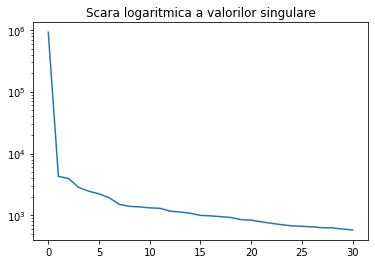

Numar de valori singulare: 31


In [4]:
#se pun valorile singulare pe scara logaritmica pentru a vedea evolutia valorilor singulare 
fig3=plt.figure(3)
plt.semilogy(s)
plt.title('Scara logaritmica a valorilor singulare')
plt.show()
print('Numar de valori singulare:', len(s))

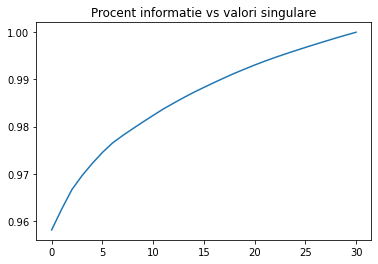

In [5]:
#Procentul informatiei pentru a salva un numar mai mic de valori singulare pentru a reconstrui poza eficient
fig4 = plt.figure(4)
plt.plot(np.cumsum(s)/np.sum(s))
plt.title('Procent informatie vs valori singulare')
plt.show()   

Vector size:  (1, 4320000)
Final image size:  (900, 1600, 3)


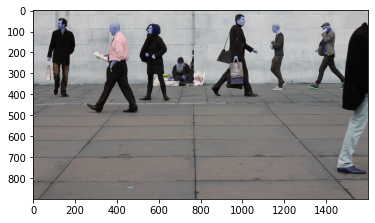

In [6]:
vector12 = np.matrix(new_flat_vector[0])
print("Vector size: ",vector12.shape)
arr2 = np.asarray(vector12).reshape(orig_shape)
print("Final image size: ",arr2.shape)
cv2.imwrite('savedImage.jpg', arr2) 
plt.imshow((arr2).astype(np.uint8))